<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/gedi_analysis_8_29_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [1]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [3]:
# while(TRUE){}

In [4]:
# drive_deauth()
# drive_auth(use_oob = TRUE, cache = FALSE)

In [5]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

# GEDI vectorized by YOD, Queen's rule.
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link

In [6]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=bfdfc4c69b916bd18fbe9af0e22f6bd3&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVXlFdlBCemRlWDlmWWFwMFRXRWtrQlhrUTZKeVRITmlPUk9Sc3VXTFczcXdicEcwN3J0a3NPbF9senU5c2dvQSIsInN0YXRlIjoiYmZkZmM0YzY5YjkxNmJkMThmYmU5YWYwZTIyZjZiZDMifQ==


File downloaded:

• HJA_LandTrendr_84_23_2.tif <id: 1FrN1tUojGV80f3kDtmezsFsvLabIoGiW>

Saved locally as:

• /content/HJA_LandTrendr_84_23.tif



In [7]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

File downloaded:

• HJA_GEDI_4.gpkg <id: 14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4>

Saved locally as:

• /content/HJA_gedi.gpkg



In [8]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

File downloaded:

• WBDHU8.gpkg <id: 1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z>

Saved locally as:

• /content/huc_8.gpkg

File downloaded:

• WBDHU10.gpkg <id: 1m86VWKw3nys-oY931eq9dC6xv0cEfs4a>

Saved locally as:

• /content/huc_10.gpkg

File downloaded:

• WBDHU12.gpkg <id: 18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL>

Saved locally as:

• /content/huc_12.gpkg



In [9]:
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link
drive_download(file = as_id('1miOMqCh081yceVUfVVOL5JtxpKUgBO-2'), path =  '/content/gedi_vector.gpkg', overwrite = TRUE)

File downloaded:

• yod_vector.gpkg <id: 1miOMqCh081yceVUfVVOL5JtxpKUgBO-2>

Saved locally as:

• /content/gedi_vector.gpkg



In [2]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [3]:
gedi_vec_gpkg <- st_read('/content/gedi_vector.gpkg') %>% st_transform(st_crs('EPSG:4326'))

Multiple layers are present in data source /content/gedi_vector.gpkg, reading layer `vectorized'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `vectorized' from data source `/content/gedi_vector.gpkg' using driver `GPKG'
Simple feature collection with 478987 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85836 xmax: -121.7595 ymax: 44.90912
Geodetic CRS:  WGS 84


In [4]:
huc_8_gpgk <- st_read('/content/huc_8.gpkg') %>% st_transform(st_crs('EPSG:4326'))
huc_10_gpgk <- st_read('/content/huc_10.gpkg')  %>% st_transform(st_crs('EPSG:4326'))
huc_12_gpgk <- st_read('/content/huc_12.gpkg')  %>% st_transform(st_crs('EPSG:4326'))

Reading layer `wbdhu8_central_oregon__wdb_oregon_state_gdb__wbdhu8' from data source `/content/huc_8.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu10' from data source 
  `/content/huc_10.gpkg' using driver `GPKG'
Simple feature collection with 27 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu12' from data source 
  `/content/huc_12.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83


In [5]:
# [# Install and load required packages
# # install.packages(c("sf", "DBI"))
# library(sf)
# library(DBI)

# # Read a spatial dataset (e.g., a shapefile) into R
# # dataset <- st_read("path_to_your_dataset.shp")

# # Connect to the PostgreSQL database
# conn <- RPostgreSQL::dbConnect("PostgreSQL",
#                  dbname = "jifesypi",
#                  host = "mild-williams-pear.db.elephantsql.com",
#                 #  port = "your_port",
#                  user = "jifesypi",
#                  password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

# # # Ensure the connection is PostGIS-enabled
# # if (!st_is_postgis(con)) {
# #   stop("The database is not PostGIS enabled!")
# # }

# # Upload the dataset to PostgreSQL
# # 'name' parameter determines the name of the table in the database
# st_write(gedi_sf, conn, layer = "hja_gedi", delete_layer = TRUE)

# # Close the database connection
# dbDisconnect(conn)


Simple feature collection with 1 feature and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -122.1787 ymin: 44.46379 xmax: -121.7935 ymax: 44.74952
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
2      523 {ED39C5F1-2255-45AE-8A3D-61F464F52D80}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
2             <NA>            <NA> 2013-01-18 08:56:26      NA  146500.8
  AreaSqKm States      HUC10                           Name HUType HUMod
2   592.87     OR 1709000502 Headwaters North Santiam River      S  <NA>
  Shape_Length Shape_Area                           geom
2     1.482265 0.06721638 MULTIPOLYGON (((-122.011 44...


[1] TRUE

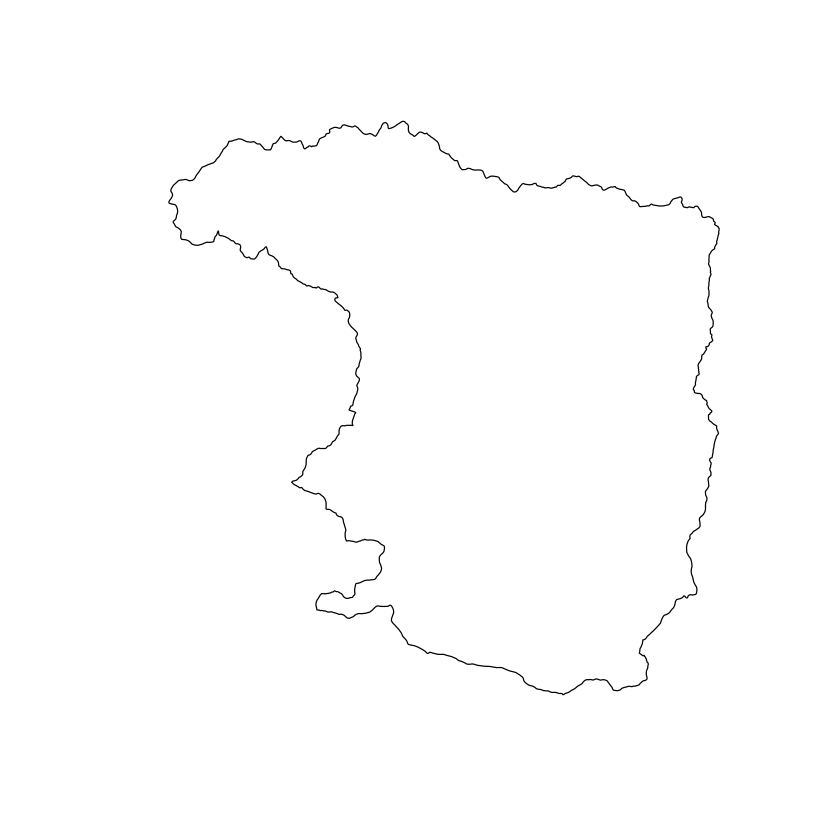

In [6]:
huc_index <- sample(1:nrow(huc_10_gpgk),1)
plot(huc_10_gpgk[huc_index,]$geom)
print(huc_10_gpgk[huc_index,])
query_wkt <- st_as_text(huc_10_gpgk[huc_index,]$geom, crs = 4326, EWKT = TRUE)

query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'",query_wkt,"')")
# print(query_sql)
# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

gedi_sf <- st_read(conn,query=query_sql)

dbDisconnect(conn)

In [7]:
gedi_dt <- gedi_sf %>% data.table
gedi_dt %>% nrow
gedi_dt[l4_quality_flag ==1,] %>% nrow

[1] 224063

[1] 78963

In [8]:
# landtrendr_tif[landtrendr_tif < 0] <- NA

In [9]:
gedi_dt[,geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(12.5)]
#consider 12.5

In [10]:
landtrendr_rast <- terra::rast(landtrendr_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(landtrendr_rast,.,force_df=T,c('min','max','mean','median'))

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”


  |======================================================================| 100%


In [11]:
summary_dt <- data.table(gedi_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

In [12]:
summary_dt$agbd[summary_dt$agbd<0] <- NA

In [13]:
delta_time_to_timestamp <- function(delta_time) {
  # Define the reference date
  reference_date <- as.POSIXct("2018-01-01 00:00:00", tz = "UTC")

  # Add the delta_time (in seconds) to the reference date
  timestamp <- reference_date + delta_time

  return(timestamp)
}

In [14]:
summary_dt$year <- delta_time_to_timestamp(summary_dt$delta_time) %>% format("%Y")

In [15]:
# summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3)), labels = FALSE, include.lowest = TRUE)) ]
# summary_dt$group <- NA
# summary_dt[!is.na(agbd) & median.preval > 0, group := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]

In [16]:
year_off <- 1

agbd_preval_lm <-
summary_dt[l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off) & round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval,na.rm=T),min.mag= mean(mean.mag,na.rm=T),agbd= mean(agbd,na.rm=T)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
  lm(agbd~min.endval,.)

summary_dt$agbd_postval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval-min.mag)])
summary_dt[min.preval ==0]$agbd_postval <-NA

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval)])
summary_dt[min.preval ==0]$agbd_preval <-NA

In [45]:
fire_history_gpkg <- st_read('/content/Fire_History_polygon.gpkg')

Reading layer `buffered' from data source `/content/Fire_History_polygon.gpkg' using driver `GPKG'
Simple feature collection with 6858 features and 23 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -13860290 ymin: 5106055 xmax: -12951640 ymax: 6304889
Projected CRS: WGS 84 / Pseudo-Mercator


In [47]:
fire_history_gpkg <- fire_history_gpkg %>% st_cast('POLYGON')

Warning message in st_cast.sf(., "POLYGON"):
“repeating attributes for all sub-geometries for which they may not be constant”


In [50]:
fire_history_int <- summary_dt %>% st_as_sf %>% st_intersects(fire_history_gpkg %>% st_transform(st_crs(summary_dt$geom)))

In [53]:
(fire_history_int %>% unlist)[1:5]

[1] 7378 7378 7378 7378 7378

In [18]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [62]:
fire_history_gpkg %>% data.table %>% head %>% names


[1] "OBJECTID"        "UNIT_ID"         "FIRE_NUM"        "FIRE_CODE"      
 [5] "FIRE_NAME"       "FIRE_YEAR"       "COMPLEX_NAME"    "INC_ID"         
 [9] "WFMI_ID"         "BLM_ORG_CD"      "FIRE_DSCRV_DATE" "CAUSE_CAT"      
[13] "CAUSE_DET"       "CLASSIFIER"      "COORD_SRC"       "COORD_DATE"     
[17] "ACCURACY_FT"     "COMMENTS"        "TOT_ACRES_RPTD"  "GIS_ACRES"      
[21] "GLOBALID"        "SHAPE_Length"    "SHAPE_Area"      "geom"

In [63]:
fire_summary_dt <- data.table(summary_dt, (fire_history_gpkg %>% data.table)[,c('FIRE_NUM','FIRE_CODE','FIRE_NAME','FIRE_YEAR')][fire_history_int %>% lapply(function(x){x[1]}) %>% unlist,])


In [65]:
fire_summary_dt$FIRE_YEAR %>% table

.
 1900  2002  2003  2006  2014  2017  2020 
 1055 19809 21768 10128   695 11966 42256 

In [59]:
huc_8_summary_dt

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,min.dsnr,year,min.endval,agbd_postval,agbd_preval,group_quantile,group,TNMID,HUC8,Name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
NA,44.56872,-122.0708,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57478,-122.0849,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57452,-122.0843,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57425,-122.0837,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57399,-122.0831,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57373,-122.0825,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57346,-122.0818,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57320,-122.0812,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA
NA,44.57294,-122.0806,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,2021,0,NA,NA,NA,NA,NA,NA,NA


In [19]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [20]:
# # resample_dt[,agbd := rnorm(1,agbd,agbd_se),by=row_id]
# # gc()
# resamp_vec <-
# 1:nrow(resample_dt) %>%
#   lapply(function(x){
#     if(!is.na())
#     rnorm(1,resample_dt$agbd[[x]],resample_dt$agbd_sd[[x]])
#   })
resample_dt <- NULL
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,17572389,938.5,29231660,1561.2,29231660,1561.2
Vcells,364972960,2784.6,595222802,4541.2,368353392,2810.4


In [56]:
summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
summary_dt$group <- NA
# summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



summary_dt$group <- NA
summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
cluster_dt$group_new <- 1:nrow(cluster_dt)
cluster_dt <- cluster_dt[order(group)]
# print(cluster_dt)
summary_dt$group <- cluster_dt$group_new[summary_dt$group]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

group_quantile,agbd_postval,n
<int>,<dbl>,<int>
1,41.82517,18356
2,87.43930,18319
3,161.31282,18850
NA,NA,168538


group,agbd_postval,n
<int>,<dbl>,<int>
1,49.92402,25343
2,110.27562,18474
3,180.03363,11708
NA,NA,168538


In [351]:
# install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [352]:
# library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




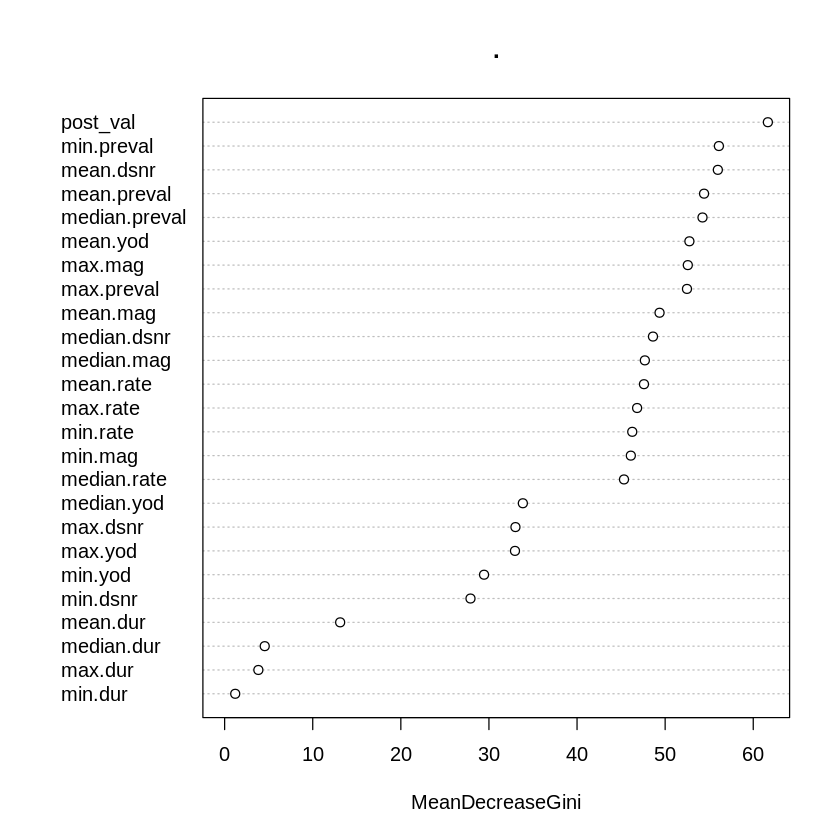

In [389]:
rf_result %>% varImpPlot

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "geom"               "geom_buffer"        "max.yod"           
[19] "max.mag"            "max.dur"            "max.preval"        
[22] "max.rate"           "max.dsnr"           "mean.yod"          
[25] "mean.mag"           "mean.dur"           "mean.preval"       
[28] "mean.rate"          "mean.dsnr"          "median.yod"        
[31] "median.mag"         "median.dur"         "median.preval"     
[34] "median.rate"        "median.dsnr"        "min.yod"           
[37] "min.mag"            "min.dur"            "min.preval"        
[40] "min.rate"           "min.dsnr"           "year"              
[43] "min.endval"         "agbd_postval"       "agbd_preval"       
[46] "group_quantile"     "group"              "FIRE_NUM"          
[49] "FIRE_CODE"          "FIRE_NAME"          "FIRE_YEAR"         
[52] "group_agbd_preval"  "group_agbd_postval" "id"                
[55] "post_val"

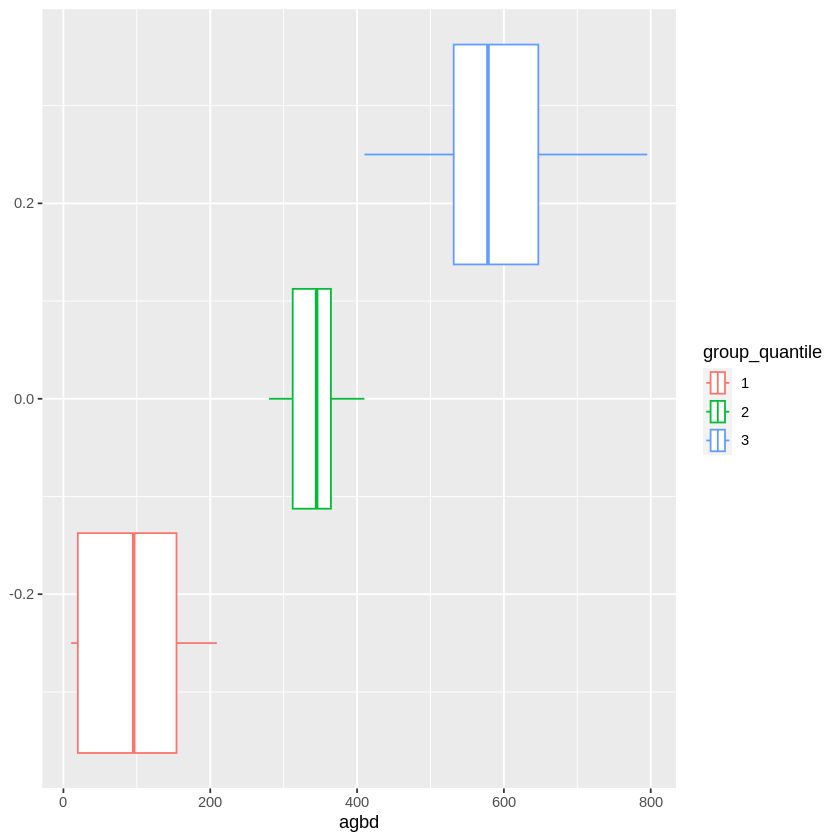

In [386]:
calibration_post_dt <- resample_dt[min.yod>1984 & !is.na(agbd) & min.yod > (year %>% as.numeric) & max.yod < (year %>% as.numeric)+5,]
calibration_dt$id <- 1:nrow(calibration_dt)
calibration_dt[,post_val := mean(mean.preval - mean.mag),by = id]
calibration_dt[,group_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
calibration_dt %>%
  ggplot(aes(x=agbd))+
  geom_boxplot(aes(color=group_quantile))
names(calibration_dt)
rf_form <- as.formula(paste('group_quantile ~',c('post_val',(calibration_dt %>% names)[18:41]) %>% paste(.,collapse = '+')))
resample_dt$id <- 1:nrow(resample_dt)

resample_dt[,group_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]

resample_dt[,post_val := mean(mean.preval - mean.mag),by = id]
rf_result <-  randomForest(rf_form,resample_dt[min.yod>1984 & !is.na(agbd)])


Warning message in round(year %>% as.numeric) + c(1, 2, 3):
“longer object length is not a multiple of shorter object length”


group_quantile,agbd_postval,n
<int>,<dbl>,<int>
1,41.82517,18356
2,87.43930,18319
3,161.31282,18850
NA,NA,168538


group,agbd_postval,n
<int>,<dbl>,<int>
1,49.92402,25343
2,110.27562,18474
3,180.03363,11708
NA,NA,168538


group,yod_round,agbd,yad,group_agbd_preval,group_agbd_postval,n,agbd_yr,agbd_yr_cumsum
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
3,1987,107.12758,35.99906,299.4243,97.58169,75,2.975844,155.00189
1,1989,70.73407,34.01110,NaN,61.19608,16,2.079735,24.40203
2,1989,73.03680,33.99583,246.1952,74.33567,287,2.148405,82.28267
3,1989,103.25474,34.00336,299.4243,97.58169,90,3.036604,149.15959
2,1987,84.77635,36.00066,246.1952,74.33567,86,2.354855,87.20266
3,1997,49.47276,26.04311,299.4243,97.58169,12,1.899649,130.62291


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


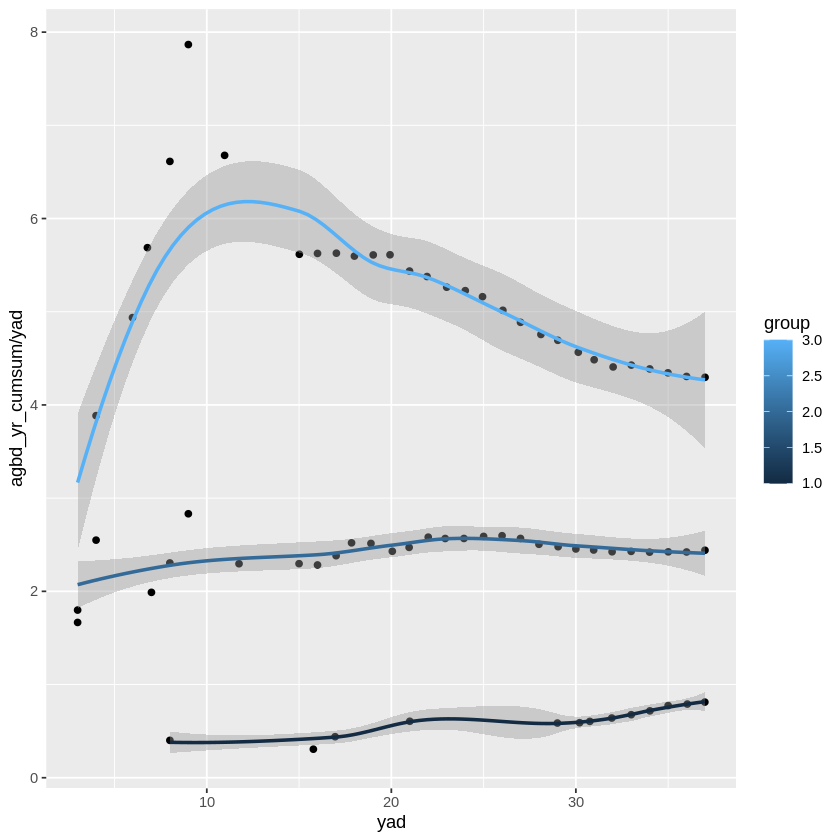

In [378]:
# 1:1000
resample_dt <- fire_summary_dt
resample_dt <- fire_summary_dt[is.na(FIRE_YEAR)]
# resample_dt$group <- resample_dt$group_quantile
year_off <- 1

# resample_dt$row_id <- 1:nrow(resample_dt)

# resample_dt[,agbd := rnorm(1,agbd,agbd_se),by=row_id]

# agbd_preval_lm <-
# resample_dt[agbd_pi_lower>0&l4_quality_flag ==1 & min.yod>1984 &
#    round(min.yod) %in% c(round(year %>% as.numeric)-c(1,2)) &
#        round(max.yod) %in% c(round(year%>% as.numeric)-c(1,2)),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval,na.rm=T),min.mag= mean(mean.mag,na.rm=T),agbd= mean(agbd,na.rm=T)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
#   lm(agbd~min.endval,.)
# min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)-c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)-c(1,2))
# resample_dt$agbd_postval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval-min.mag)])

# resample_dt$agbd_preval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval)])
# resample_dt[,agbd_postval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]
# resample_dt[,agbd_preval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]

resample_dt[,group_agbd_preval:=mean(agbd[min.yod>1984 & round(mean.yod) %in% c(round(year %>% as.numeric)+c(1,2,3))],na.rm=T) ,by=group]

resample_dt[,group_agbd_postval:=mean(agbd[min.yod>1984 & round(mean.yod) < round(year %>% as.numeric) ],na.rm=T) ,by=group]


plot_dt <- resample_dt[min.yod>1984 & round(max.yod) < (year %>% as.numeric-1) &l4_quality_flag ==1,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd,na.rm=T),yad = mean(2023-mean.yod),group_agbd_preval=mean(group_agbd_preval,na.rm=T),group_agbd_postval=mean(group_agbd_postval,na.rm=T),n = length(mean.yod)),by = .(group,yod_round)][yad>1]


plot_dt[,agbd_yr:=(agbd)/yad,by=group]

plot_dt[order(yad),agbd_yr_cumsum := cumsum(agbd_yr),by = group]

summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
summary_dt$group <- NA
# summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



summary_dt$group <- NA
summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
cluster_dt$group_new <- 1:nrow(cluster_dt)
cluster_dt <- cluster_dt[order(group)]
# print(cluster_dt)
summary_dt$group <- cluster_dt$group_new[summary_dt$group]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

plot_dt %>% head

plot_dt %>%

ggplot(aes(x=yad,y=agbd_yr_cumsum/yad,group=group))+

geom_point()+

geom_smooth(aes(color=group))


# plot_dt %>%
# ggplot(aes(x=yad,y=agbd_yr_cumsum,group=group_quantile))+
# geom_point()+
# geom_line(aes(color=group_quantile))
# geom_smooth(data=pred_dt,aes(),color='red')

In [ ]:
gedi_vec_gpkg$area <- st_area(gedi_vec_gpkg)

summary_dt$gedi_clust <- st_intersects(summary_dt$geom,gedi_vec_gpkg) %>% lapply(function(x){x[1]}) %>% unlist
summary_dt$gedi_clust_area <- gedi_vec_gpkg$area[summary_dt$gedi_clust]

In [ ]:
summary_dt[min.yod > 1984 & agbd>0 &l4_quality_flag ==1,] %>%
  ggplot(aes(y=(agbd - agbd_preval)/(2023-max.yod),x=max.yod,group=group))+
  geom_point() +
  # geom_line(aes(color=group))+
  geom_smooth(aes(color=group))

In [ ]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
targ_dt <- huc_10_summary_dt[Name == 'Thomas Creek' & group ==1]

loess_dt <- huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3]

huc_10_summary_dt[,yad := 2023-mean.yod]
targ_dt$agbd_pred <-
predict(loess_dt[Name == 'Thomas Creek' & group == 1] %>%
  loess(agbd~yad,.), targ_dt)

In [ ]:
targ_dt[yad>3,] %>%
  ggplot(aes(x=agbd_pred-agbd))+
  geom_histogram(bins=100)

In [ ]:
targ_dt[yad>3,] %>% st_as_sf() %>% st_write('/content/example.gpkg')

In [ ]:
huc_10_dist_table <- huc_10_summary_dt$Name %>% table
huc_10_summary_dt <- huc_10_summary_dt[Name %in% c(huc_10_dist_table[huc_10_dist_table>100] %>% names),]

huc_10_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']



fit <- loess(y ~ x)
predictions <- predict(fit, newdata = data.frame(x = x))

huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)


In [ ]:
huc_12_dist_table <- huc_12_summary_dt$Name %>% table
huc_12_summary_dt <- huc_12_summary_dt[Name %in% c(huc_12_dist_table[huc_12_dist_table>100] %>% names),]

huc_12_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']





huc_12_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)